## Agenda
    1 - Modo Normal
    E se...
        2 - Removêssemos ['garage'] da equação?
        3 - Removêssemos todos os outliers?
        4 - Retirássemos aquele cara? 600m² (º-º )
        5 - "Padronizarmos" mais os dados?

    Estudos
         Diferença entre Preços e Predições
         Porcentagem de erro
             Em termos de negócio (R$)

In [2]:
import pandas as pd
import numpy as np 

# Separa dados de treino e teste
from sklearn.model_selection import train_test_split

# Modelo/Algoritmo
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Visualizar Resultados
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_pickle('5 Apartamentos para modelagem.pkl')
df.reset_index(drop= True, inplace=True)
df.drop(columns="price by m²",inplace=True)
df.head()

,price,district,bedroom,bathroom,size,garage
0,174000,Parnamirim,1,1,34.0,1
1,180000,Rosarinho,1,1,34.0,1
2,190000,Rosarinho,1,1,33.0,1
3,190000,Tamarineira,1,1,34.0,1
4,195000,Boa Viagem,1,1,30.0,1


## 1 - Modo Normal
Os mesmos passos que fiz para a criação do 1º modelo. Nada diferente.

In [16]:
# one-hot encoding
dummies = pd.get_dummies(df.district)
# Unindo bairros codificados com as features
data_frame = pd.concat([df,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
# Separando features e labels
X = data_frame.drop(columns="price")
y = data_frame.price

In [20]:
# Separando dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Criando instância do Modelo
linear_model  = LinearRegression()

# Treinando o modelo
linear_model.fit(X_train,y_train)

# Testando a performance do modelo com dados que ele não viu
linear_model.score(X_test,y_test)

0.8234181808173429

Algo que não fiz anteriormente foi a [validação cruzada](https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/).

In [21]:
# Validação cruzada
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
cross_val_score(LinearRegression(), X, y, cv=cross_validation)

array([0.83323989, 0.82735162, 0.84001009, 0.81813932, 0.8253129 ])

In [22]:
''' Hummm, a média dos scores fica em torno de 80% '''

def Average(lst): 
    return sum(lst) / len(lst)

cv_results = []

for test in range(100):
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
    cv = cross_val_score(LinearRegression(), X, y, cv=cross_validation)
    for value in cv:
        cv_results.append(value)

print(Average(cv_results))

0.8265424904175944


Mas... e se
## 2 - Removêssemos ['garage'] da equação?

In [23]:
df_no_garage = df.drop(columns='garage')
df_no_garage.head(1)

,price,district,bedroom,bathroom,size
0,174000,Parnamirim,1,1,34.0


In [24]:
dummies = pd.get_dummies(df_no_garage.district)
data_frame = pd.concat([df_no_garage,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
X = data_frame.drop(columns="price")
y = data_frame.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_model  = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.8272856853014017

In [25]:
cv_results = []

for test in range(100):
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
    cv = cross_val_score(LinearRegression(), X, y, cv=cross_validation)
    for value in cv:
        cv_results.append(value)

print(Average(cv_results))

0.8255854924561511


Uau! Acaba não afetando tanto a predição. O que faz sentido já que ao utilizar o feature_importances_ da DecisionTreeRegressor as vagas de estacionamento influenciavam 1% no preço do apartamento _"0.01 ----- garage"_. 

      Se bem que 0.01 ----- bedroom
                 0.02 ----- bathroom
      Huhmmm...
                 
Talvez eu devesse ter limpado mais os dados?

E se...
## 3 - Removêssemos todos os outliers?

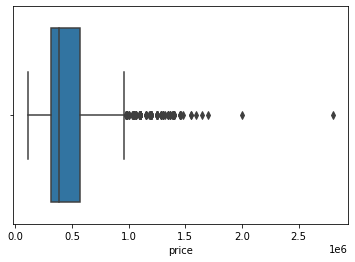

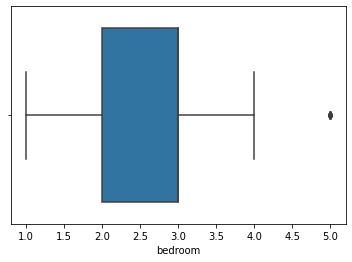

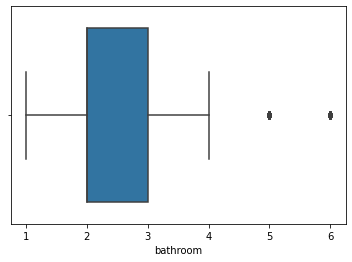

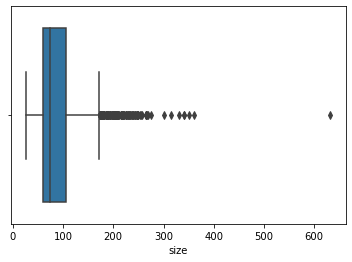

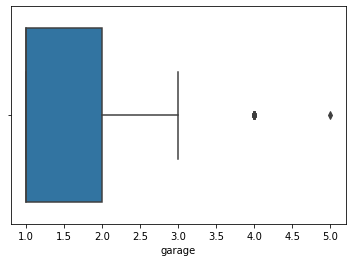

In [59]:
for column in df.columns:
    if(df[column].dtype != 'object'):
        sns.boxplot(df[column])
        plt.show()

In [26]:
df_no_outlier = df.copy()

In [27]:
df_no_outlier = df_no_outlier[df_no_outlier.price < 1000000]

In [28]:
df_no_outlier = df_no_outlier[df_no_outlier.bedroom < 5]

In [29]:
df_no_outlier = df_no_outlier[df_no_outlier.bathroom < 5]

In [30]:
df_no_outlier = df_no_outlier[df_no_outlier.garage < 4]

In [31]:
dummies = pd.get_dummies(df_no_outlier.district)
data_frame = pd.concat([df_no_outlier,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
X = data_frame.drop(columns="price")
y = data_frame.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_model  = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.7822146514727949

In [32]:
cv_results = []

for test in range(100):
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
    cv = cross_val_score(LinearRegression(), X, y, cv=cross_validation)
    for value in cv:
        cv_results.append(value)

print(Average(cv_results))

0.7722011845295652


In [33]:
df_no_outlier.shape

(3624, 6)

In [35]:
df.shape

(3900, 6)

Menor? Hummm no fim da análise comentei algo sobre "outliers seguros", será que é isso mesmo ou simplesmente a quantidade de dados que é menor? Se bem que...

E se
## 4 - Retirássemos aquele cara? 600m² (º-º )

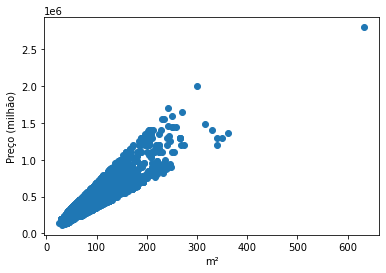

In [107]:
plt.scatter(df['size'], df.price)
plt.xlabel('m²')
plt.ylabel('Preço (milhão)')
plt.show()

In [207]:
df_test = df.copy()

In [208]:
df_test = df_test[df_test['size'] < 500]

In [120]:
dummies = pd.get_dummies(df_test.district)
data_frame = pd.concat([df_test,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
X = data_frame.drop(columns="price")
y = data_frame.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_model  = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.8039796286414927

Éh

E se 
## 5 - Padronizarmos mais os dados?
Alguns dos que me incomodavam ao final da análise.

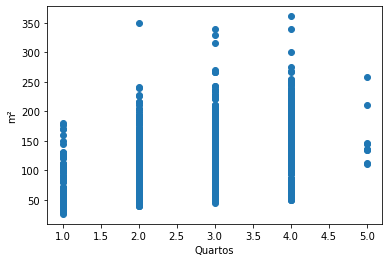

In [209]:
plt.scatter(df_test.bedroom, df_test['size'])
plt.xlabel('Quartos')
plt.ylabel('m²')
plt.show()

In [210]:
df_test = df_test[~((df_test.bedroom == 1) & (df_test['size'] > 100))]

In [211]:
df_test = df_test[~((df_test.bedroom == 2) & (df_test['size'] > 200))]

In [212]:
df_test = df_test[~((df_test.bedroom == 3) & (df_test['size'] < 100))]

In [213]:
df_test = df_test[~((df_test.bedroom == 4) & (df_test['size'] < 120))]

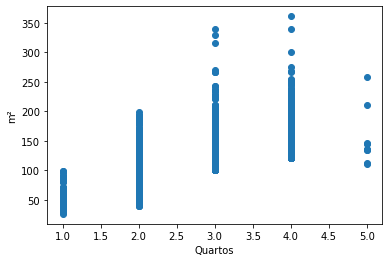

In [214]:
plt.scatter(df_test.bedroom, df_test['size'])
plt.xlabel('Quartos')
plt.ylabel('m²')
plt.show()

Tamanho por banheiro também foi alterado devido às mudanças que acabei de fazer.

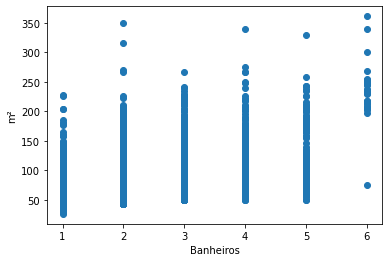

In [158]:
# Antes
plt.scatter(df_test.bathroom, df_test['size'])
plt.xlabel('Banheiros')
plt.ylabel('m²')
plt.show()

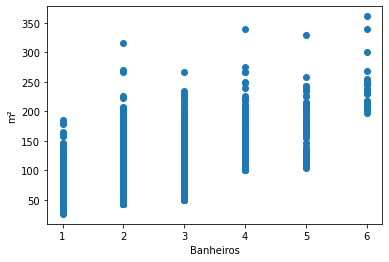

In [215]:
# Depois
plt.scatter(df_test.bathroom, df_test['size'])
plt.xlabel('Banheiros')
plt.ylabel('m²')
plt.show()

In [216]:
dummies = pd.get_dummies(df_test.district)
data_frame = pd.concat([df_test,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
X = data_frame.drop(columns="price")
y = data_frame.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_model  = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.8226257160688459

In [194]:
cv_results = []

for test in range(100):
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
    cv = cross_val_score(LinearRegression(), X, y, cv=cross_validation)
    for value in cv:
        cv_results.append(value)

print(Average(cv_results))

0.835756269870022


Também não muda muito... então vamos tirar mais kkkk

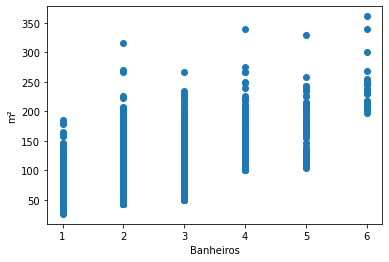

In [217]:
plt.scatter(df_test.bathroom, df_test['size'])
plt.xlabel('Banheiros')
plt.ylabel('m²')
plt.show()

In [218]:
df_test = df_test[~((df_test.bathroom == 1) & (df_test['size'] > 100))]

In [219]:
df_test = df_test[~((df_test.bathroom == 2) & (df_test['size'] > 200))]

In [220]:
df_test = df_test[~((df_test.bathroom == 3) & (df_test['size'] < 100))]

In [221]:
df_test = df_test[~((df_test.bathroom == 4) & (df_test['size'] < 120))]

In [224]:
df_test = df_test[~((df_test.bathroom == 5) & (df_test['size'] < 140))]

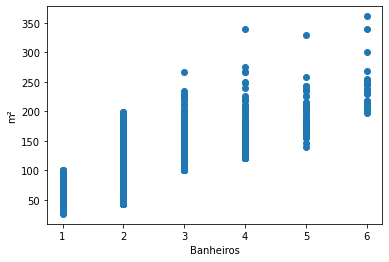

In [225]:
plt.scatter(df_test.bathroom, df_test['size'])
plt.xlabel('Banheiros')
plt.ylabel('m²')
plt.show()

In [234]:
dummies = pd.get_dummies(df_test.district)
data_frame = pd.concat([df_test,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
X = data_frame.drop(columns="price")
y = data_frame.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_model  = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.8332437707329378

In [235]:
cv_results = []

for test in range(100):
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
    cv = cross_val_score(LinearRegression(), X, y, cv=cross_validation)
    for value in cv:
        cv_results.append(value)

print(Average(cv_results))

0.8356233130523109


In [236]:
df_test.shape

(1946, 6)

Mesmo resultado, melhorias, mas melhorias mínimas. É provável que (apenas?) um conjunto de dados maior possa trazer um aumento considerável nos scores.

## Estudos

Já que durante os testes a coluna ['garage'] praticamente não afetou as predições, não a usaremos mais. 

In [2]:
df = pd.read_pickle('5 Apartamentos para modelagem.pkl')
df.reset_index(drop= True, inplace=True)
df.drop(columns=["price by m²", "garage"],inplace=True)
df.head()

,price,district,bedroom,bathroom,size
0,174000,Parnamirim,1,1,34.0
1,180000,Rosarinho,1,1,34.0
2,190000,Rosarinho,1,1,33.0
3,190000,Tamarineira,1,1,34.0
4,195000,Boa Viagem,1,1,30.0


In [3]:
dummies = pd.get_dummies(df.district)

data_frame = pd.concat([df,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)

X = data_frame.drop(columns="price")
y = data_frame.price

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model  = LinearRegression()

linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.8242419794322273

### Diferença entre Preços e Predições

In [91]:
def subtract_price_predictions(iterations):
    positive_difference = []
    negative_difference = []
    differences = []
    
    for testing_model in range(iterations):
        sampling = X.sample()
        prediction = linear_model.predict(sampling)[0]
        y_value = data_frame.loc[sampling.index[0]].price

        difference = int(y_value - prediction)

        differences.append(difference)

        if difference > 0:
            positive_difference.append(difference)
        else:
            negative_difference.append(difference)
    
    positive = len(positive_difference)
    negative = len(negative_difference)
    
    print(f"{positive} diferenças positivas {round(positive/len(differences)*100, 2)}%")
    print(f"{negative} diferenças negativas {round(negative/len(differences)*100, 2)}%")
    print(f"Soma das diferenças = {sum(positive_difference) + sum(negative_difference)}")
    
    return differences

differences = subtract_price_predictions(100)

54 diferenças positivas 54.0%
46 diferenças negativas 46.0%
Soma das diferenças = -636817


As predições se afastam tanto "para cima quanto para baixo". Mas a soma dos afastamenos não nos diz exatamente se o modelo tende a estimar valores mais altos ou mais baixos que o preço real.

In [68]:
subtract_price_predictions(100)

57 diferenças positivas 57.0%
43 diferenças negativas 43.0%
Soma das diferenças = 471271


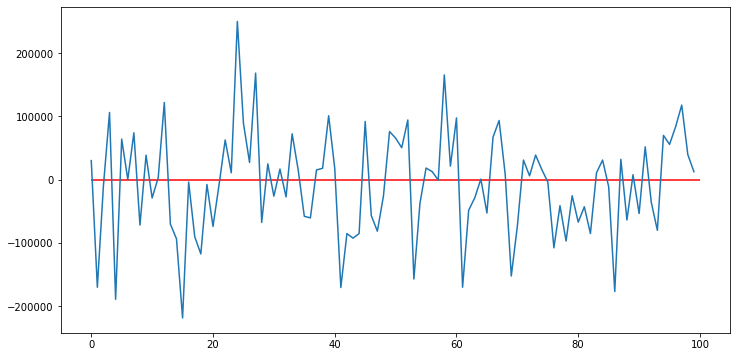

In [87]:
plt.figure(figsize=(12,6))
plt.plot(differences)
plt.hlines(y=0, xmin=0, xmax=len(differences), colors='red')
plt.show()

In [71]:
subtract_price_predictions(1000)

533 diferenças positivas 53.3%
467 diferenças negativas 46.7%
Soma das diferenças = 1243236


In [73]:
subtract_price_predictions(2000)

1037 diferenças positivas 51.85%
963 diferenças negativas 48.15%
Soma das diferenças = -346109


11 diferenças positivas 55.0%
9 diferenças negativas 45.0%
Soma das diferenças = 14672


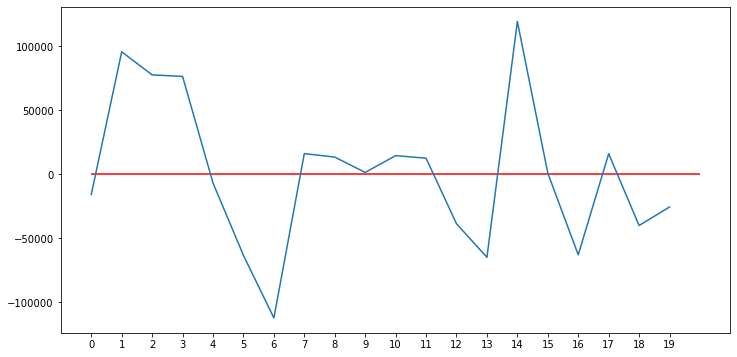

In [110]:
differences = subtract_price_predictions(20)

plt.figure(figsize=(12,6))
plt.plot(differences)
plt.hlines(y=0, xmin=0, xmax=len(differences), colors='red')
plt.xticks(range(len(differences)))
plt.show()

In [125]:
dummies = pd.get_dummies(df.district)

data_frame = pd.concat([df,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)

X = data_frame.drop(columns="price")
y = data_frame.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model  = LinearRegression()

linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.8433211556682709

### Eliminando imóveis menores que 50m²

In [3]:
df = pd.read_pickle('5 Apartamentos para modelagem.pkl')
df.reset_index(drop= True, inplace=True)
df.drop(columns="price by m²",inplace=True)
df.head()

,price,district,bedroom,bathroom,size,garage
0,174000,Parnamirim,1,1,34.0,1
1,180000,Rosarinho,1,1,34.0,1
2,190000,Rosarinho,1,1,33.0,1
3,190000,Tamarineira,1,1,34.0,1
4,195000,Boa Viagem,1,1,30.0,1


In [21]:
df = df[df['size'] > 50]

In [4]:
# one-hot encoding
dummies = pd.get_dummies(df.district)
# Unindo bairros codificados com as features
data_frame = pd.concat([df,dummies], axis="columns")
data_frame.drop(columns="district",inplace=True)
# Separando features e labels
X = data_frame.drop(columns="price")
y = data_frame.price

In [5]:
# Separando dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Criando instância do Modelo
linear_model  = LinearRegression()

# Treinando o modelo
linear_model.fit(X_train,y_train)

# Testando a performance do modelo com dados que ele não viu
linear_model.score(X_test,y_test)

0.8341288078123293

## Porcentagem de erro. 
Sem explicações, só pensando... 

In [6]:
prices = []
predictions = []
    
for testing_model in range(3000):
    sampling = X.sample()
    prediction = linear_model.predict(sampling)[0]
    y_value = data_frame.loc[sampling.index[0]].price

    predictions.append(prediction)
    prices.append(y_value)

In [7]:
differences = pd.DataFrame({'Prices': prices, 'Predictions': predictions})
differences.head()

,Prices,Predictions
0,146213.0,217051.5
1,380000.0,443558.5
2,340000.0,366472.0
3,310000.0,334716.0
4,380000.0,324472.0


In [8]:
differences['Diferença'] = differences.Prices - differences.Predictions
differences.head()

,Prices,Predictions,Diferença
0,146213.0,217051.5,-70838.5
1,380000.0,443558.5,-63558.5
2,340000.0,366472.0,-26472.0
3,310000.0,334716.0,-24716.0
4,380000.0,324472.0,55528.0


In [9]:
# Módulo para manter as diferenças positivas.
differences['Diferença_absoluta'] = np.abs(differences['Diferença'])
differences.head()

,Prices,Predictions,Diferença,Diferença_absoluta
0,146213.0,217051.5,-70838.5,70838.5
1,380000.0,443558.5,-63558.5,63558.5
2,340000.0,366472.0,-26472.0,26472.0
3,310000.0,334716.0,-24716.0,24716.0
4,380000.0,324472.0,55528.0,55528.0


In [10]:
differences['Porcentagem_da_diferença'] = differences['Diferença_absoluta'] / differences.Prices
differences.head()

,Prices,Predictions,Diferença,Diferença_absoluta,Porcentagem_da_diferença
0,146213.0,217051.5,-70838.5,70838.5,0.484488
1,380000.0,443558.5,-63558.5,63558.5,0.167259
2,340000.0,366472.0,-26472.0,26472.0,0.077859
3,310000.0,334716.0,-24716.0,24716.0,0.079729
4,380000.0,324472.0,55528.0,55528.0,0.146126


In [11]:
differences['Porcentagem_da_diferença'].describe()

count    3000.000000
mean        0.152538
std         0.117099
min         0.000075
25%         0.064093
50%         0.125814
75%         0.208357
max         0.742327
Name: Porcentagem_da_diferença, dtype: float64

In [12]:
len(differences[differences['Porcentagem_da_diferença'] > 0.3])

332

In [13]:
len(differences[differences['Porcentagem_da_diferença'] < 0.3])

2668

In [14]:
332/differences.shape[0]

0.11066666666666666

In [15]:
2668/differences.shape[0]

0.8893333333333333

**Em termos de negócio (R$)**

In [16]:
differences.Diferença_absoluta.describe()

count      3000.000000
mean      67888.848167
std       59568.845817
min          23.500000
25%       24426.125000
50%       52655.250000
75%       97695.375000
max      507392.000000
Name: Diferença_absoluta, dtype: float64

In [17]:
not_so_good_error = differences[differences['Diferença_absoluta'] < 100000]
not_so_good_error.Diferença_absoluta.mean()

41264.88693356797

In [18]:
len(not_so_good_error) / len(differences)

0.7576666666666667

In [19]:
not_so_good_error.Diferença_absoluta.describe()

count     2273.000000
mean     41264.886934
std      26841.186451
min         23.500000
25%      19098.000000
50%      36711.500000
75%      62435.000000
max      99934.000000
Name: Diferença_absoluta, dtype: float64

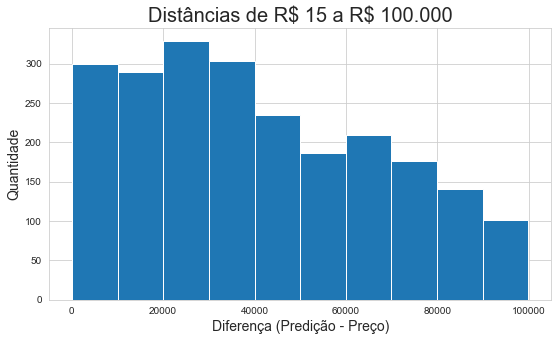

In [20]:
sns.set_style("whitegrid")

plt.figure(figsize=(9,5))
not_so_good_error.Diferença_absoluta.hist()
plt.title("Distâncias de R\$ 15 a R\$ 100.000", fontsize=20)
plt.xlabel("Diferença (Predição - Preço)", fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.show()

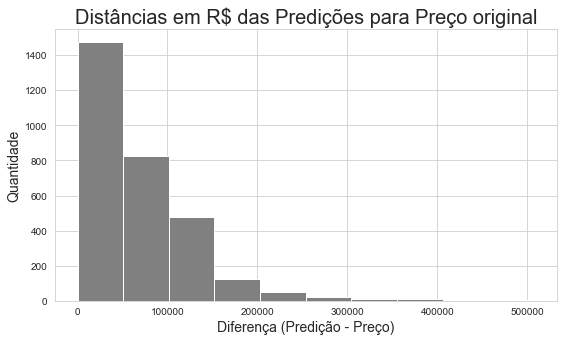

In [21]:
plt.figure(figsize=(9,5))
differences['Diferença_absoluta'].hist(color='grey')
plt.title("Distâncias em R\$ das Predições para Preço original", fontsize=20)
plt.xlabel("Diferença (Predição - Preço)", fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.show()

In [22]:
good_error = differences[differences['Diferença_absoluta'] < 50000]

good_error.Diferença_absoluta.mean()

24062.372770919068

In [23]:
len(good_error) / len(differences)

0.486

In [24]:
not_so_good__bad_error =  differences[(differences['Diferença_absoluta'] > 50000) &
                                      (differences['Diferença_absoluta'] < 100000)]
len(not_so_good__bad_error) / len(differences)

0.27166666666666667